In [939]:
import pandas as pd
import numpy as np
import import_ipynb
import Data
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [940]:
df = pd.read_csv('Data Set for Assignment 1.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [941]:
initial_data = Data.data_fix(df)
d1 = Data.dshuffle(initial_data)
train, test = Data.split(d1)

In [942]:
tclass = train['diagnosis'].tolist()
train = train.drop(columns = ['id', 'diagnosis'])
teclass = test['diagnosis'].tolist()
test = test.drop(columns = ['id', 'diagnosis'])

In [943]:
lda = LinearDiscriminantAnalysis()
lda.fit(train,tclass)

LinearDiscriminantAnalysis()

In [944]:
omega = lda.coef_
omega = omega[0].tolist()
intercept = list(lda.intercept_)

In [945]:
#Now we project the Data to the hyperplane that we found above
mproj = []
bproj = []

for i in range(len(tclass)):
    if(tclass[i] == 'B'):
        sum = 0
        for j in range(len(omega)):
            sum = sum + omega[j] * train.iloc[i,j]
        bproj.append(sum)
    elif(tclass[i] == 'M'):
        sum = 0
        for j in range(len(omega)):
            sum = sum + omega[j] * train.iloc[i,j]
        mproj.append(sum)


In [946]:
#Now we try to find the boundary of separation
b_mean = np.mean(bproj)
m_mean = np.mean(mproj)
b_stdev = np.std(bproj)
m_stdev = np.std(mproj)


In [947]:
x = np.linspace(30,80, 10000)
y = 1/(b_stdev * np.sqrt(2 * np.pi)) * np.exp(-(x - b_mean)**2 / (2 * b_stdev**2)) #corresponds to distribution of B
z = 1/(m_stdev * np.sqrt(2 * np.pi)) * np.exp(-(x - m_mean)**2 / (2 * m_stdev**2)) #corresponds to distribution of M

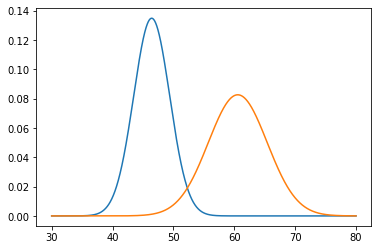

In [948]:
plt.plot(x,y)
plt.plot(x,z)

In [949]:
for i in range(len(y)):
    diff = y[i] - z[i]
    if(diff < 0):
        boundary = i
        break

In [950]:
x[boundary]

52.292229222922295

In [951]:
proj = []

for i in range(len(teclass)):
    sum = 0
    for j in range(len(omega)):
        sum = sum + omega[j] * test.iloc[i,j]
    proj.append(sum)

In [952]:
prediction = []

for i in range(len(proj)):
    if (proj[i] > x[boundary]):
        prediction.append('M')
    else:
        prediction.append('B')

correct = 0

for i in range(len(prediction)):
    if (prediction[i] == teclass[i]):
        correct = correct + 1

accuracy  = correct/len(prediction)
print(accuracy)

0.9838709677419355
